<a href="https://colab.research.google.com/github/aksanaboo/books/blob/main/Goodreads_bookEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
book_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/books.csv',error_bad_lines=False)

<ipython-input-161-97d99aed7ef1>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/books.csv',error_bad_lines=False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



In [162]:
# dataset book
book_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [163]:
# (rows,columns)
book_df.shape

(11123, 12)

In [164]:
# check for missing values
book_df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [165]:
# check for duplicated values
book_df.duplicated().sum()

0

In [166]:
# stats of numerical columns
book_df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [167]:
# columns data type
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [168]:
book_df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

**Column Names + Descriptions**:
- **bookID** Contains the unique ID for each book/series
- **title** contains the titles of the books
- **authors** contains the author of the particular book
- **average_rating** the average rating of the books, as decided by the users
- **isbn** ISBN(10) number, tells the information about a book - such as  
   edition and publisher
- **isbn 13** The new format for ISBN, implemented in 2007. 13 digits
- **language_code** Tells the language for the books
- **num_pages** Contains the number of pages for the book
- **ratings_count** Contains the number of ratings given for the book
- **text_reviews_count** Has the count of reviews left by users

**num_pages column seems to have a missing value/symbol in front**

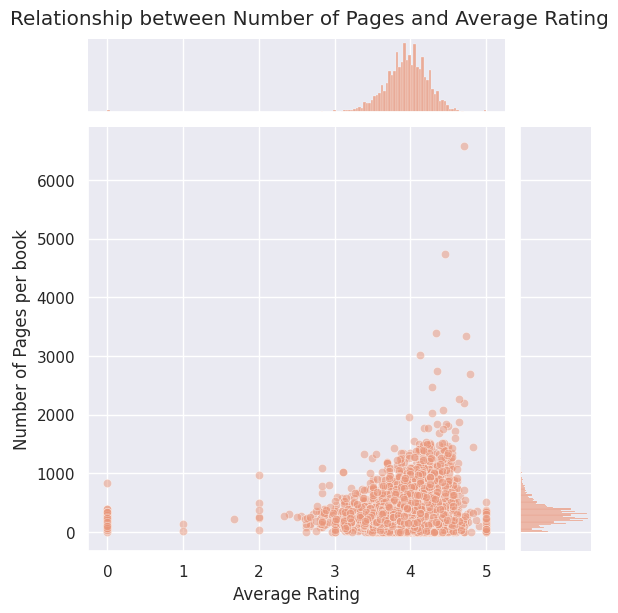

In [169]:
# Relationship between Average rating and Number of pages
sns.set(style="darkgrid")
sns.jointplot(x=book_df.iloc[:, 3], y=book_df.iloc[:, 7],kind='scatter',alpha=0.5,color='darksalmon')

plt.xlabel('Average Rating')
plt.ylabel('Number of Pages per book')
plt.suptitle('Relationship between Number of Pages and Average Rating',y=1.02)
plt.show()

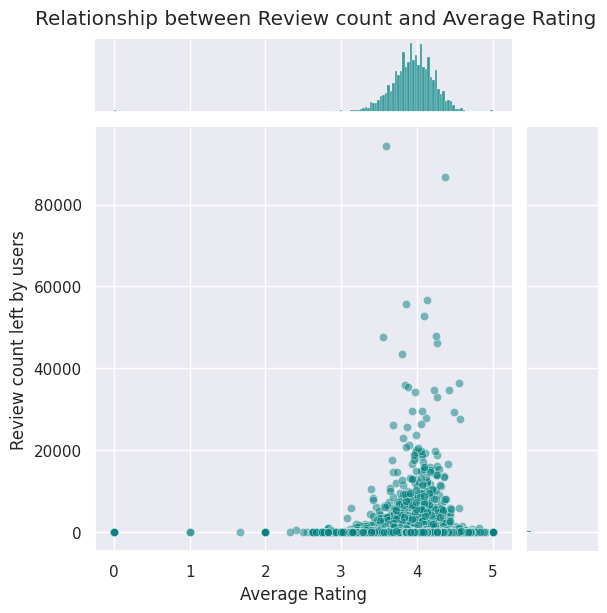

In [170]:
# Relationship between Average rating and Text reviews count
sns.set(style="darkgrid")
sns.jointplot(x=book_df['average_rating'], y=book_df['text_reviews_count'],kind='scatter',alpha=0.5,color='teal')

plt.xlabel('Average Rating')
plt.ylabel('Review count left by users')
plt.suptitle('Relationship between Review count and Average Rating', y=1.02)
plt.show()

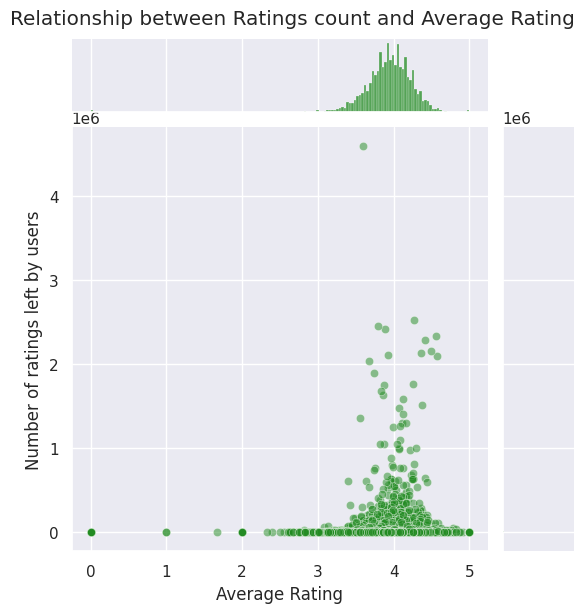

In [171]:
# Relationship between Average rating and Ratings count
sns.set(style="darkgrid")
sns.jointplot(x=book_df['average_rating'], y=book_df['ratings_count'],kind='scatter',alpha=0.5,color='forestgreen')

plt.xlabel('Average Rating')
plt.ylabel('Number of ratings left by users')
plt.suptitle('Relationship between Ratings count and Average Rating', y=1.02)
plt.show()

In [172]:
# Top 30 publishers with the highest ratings
publisher = book_df.groupby('publisher')['average_rating'].mean()
publisher = pd.DataFrame(publisher)
publisher.head()

,average_rating
publisher,
10/18,3.65
1st Book Library,3.58
1st World Library,4.18
A & C Black (Childrens books),4.40
A Harvest Book/Harcourt Inc.,4.07


In [173]:
publisher.shape

(2290, 1)

In [174]:
publisher.sort_values(by='average_rating',ascending=False,inplace=True)

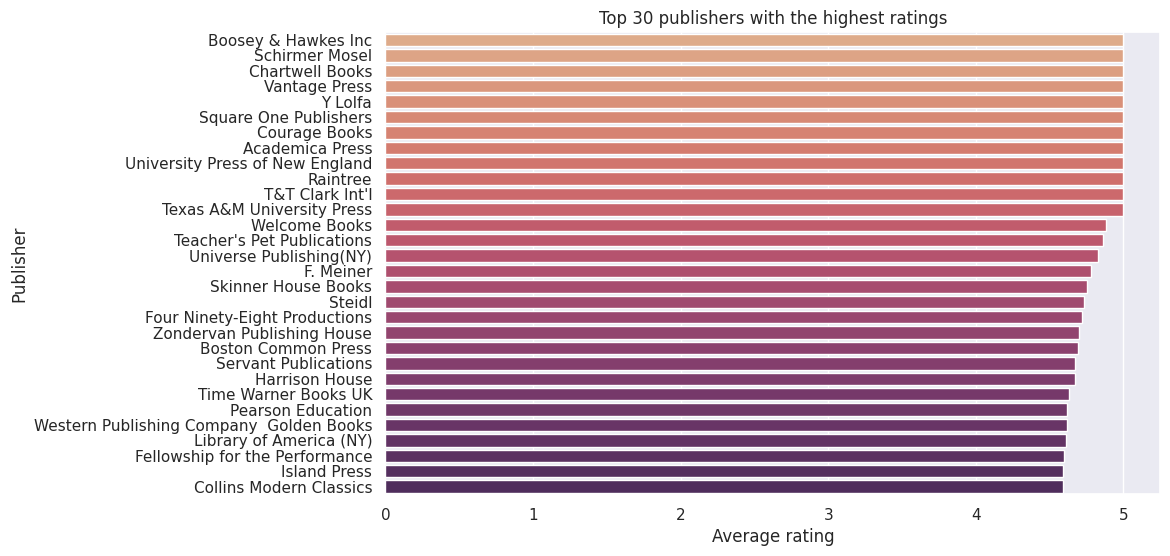

In [175]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=publisher,x=publisher['average_rating'][:30],y=publisher.index[:30],palette='flare')
plt.title('Top 30 publishers with the highest ratings')
plt.xlabel('Average rating')
plt.ylabel('Publisher')
plt.show()

In [176]:
#Language distribution

In [177]:
book_df.language_code.value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [178]:
def language_clean(language_code):
  list_1 = ['eng','en-US','en-GB','en-CA']
  if language_code in list_1:
    return 'English'
  elif language_code == 'fre':
    return 'French'
  elif language_code == 'spa':
    return 'Spanish'
  else:
    return 'Others'

In [179]:
book_df['language_code'] = book_df['language_code'].apply(language_clean)

In [180]:
book_df['language_code'].value_counts()

English    10537
Others       224
Spanish      218
French       144
Name: language_code, dtype: int64

Text(0, 0.5, 'Book Count')

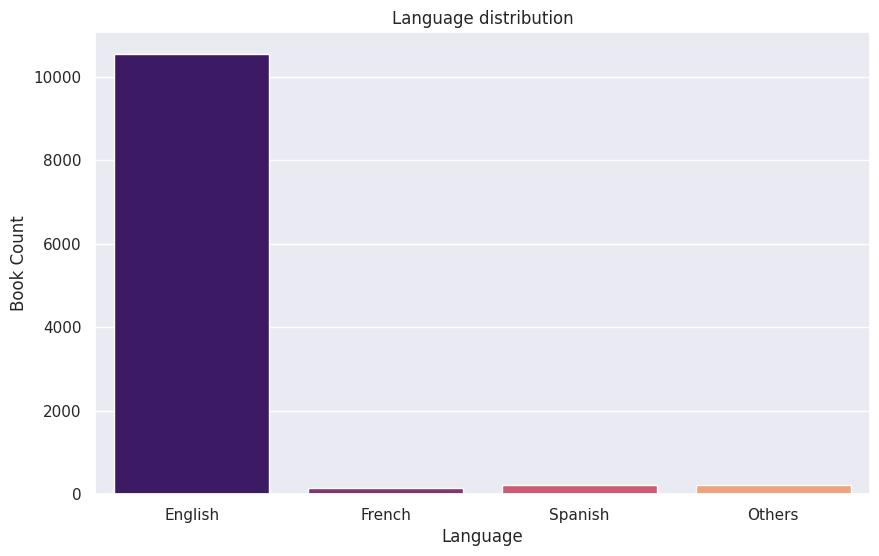

In [181]:
# language distribution of books
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=book_df,x='language_code',palette='magma')
plt.title('Language distribution')
plt.xlabel('Language')
plt.ylabel('Book Count')

In [182]:
book_df.publication_date.dtype

dtype('O')

In [183]:
book_df[['publication_month','publication_day','publication_year']] = book_df['publication_date'].str.split('/', expand=True)

In [184]:
publication_stat = book_df.groupby('publication_year')['average_rating'].mean()

In [185]:
publication_stat = pd.DataFrame(publication_stat)

In [186]:
publication_stat.reset_index(inplace=True)

In [187]:
publication_stat.shape

(87, 2)

In [188]:
publication_stat.head()

,publication_year,average_rating
0,1900,3.88
1,1913,3.96
2,1914,3.95
3,1919,4.32
4,1921,4.14


In [189]:
publication_stat.publication_year.dtype

dtype('O')

In [190]:
publication_stat['publication_year'] = publication_stat['publication_year'].astype(int,)

In [191]:
publication_stat['publication_year'].dtype

dtype('int64')

In [192]:
publication_stat['publication_year'].unique().tolist()

[1900,
 1913,
 1914,
 1919,
 1921,
 1922,
 1923,
 1925,
 1928,
 1929,
 1931,
 1935,
 1940,
 1943,
 1947,
 1948,
 1949,
 1950,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

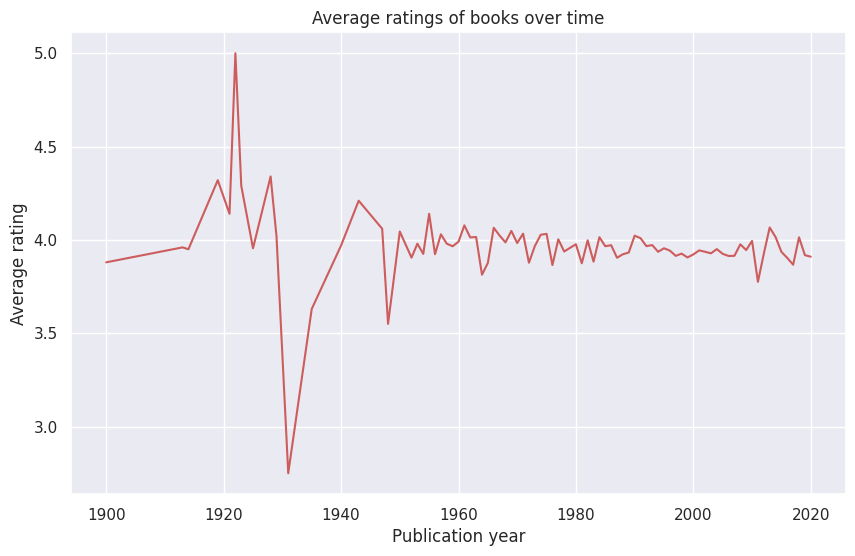

In [193]:
#Relationship between Average rating and Publication year
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=publication_stat['publication_year'],y=publication_stat['average_rating'],markers=True,color='indianred')
plt.title('Average ratings of books over time')
plt.xlabel('Publication year')
plt.ylabel('Average rating')
plt.show()

In [194]:
# top books that exist in different editions
book_df.title.value_counts()

The Iliad                                               9
The Brothers Karamazov                                  9
The Odyssey                                             8
Anna Karenina                                           8
'Salem's Lot                                            8
                                                       ..
The Noonday Demon: An Atlas of Depression               1
The Noonday Demon: An Anatomy of Depression             1
My Secret: A PostSecret Book                            1
The Secret Lives of Men and Women: A PostSecret Book    1
Las aventuras de Tom Sawyer                             1
Name: title, Length: 10348, dtype: int64

In [195]:
title = pd.DataFrame(book_df.title.value_counts())

In [196]:
title.rename(columns={'title':'count'},inplace=True)

In [197]:
title.head()

,count
The Iliad,9
The Brothers Karamazov,9
The Odyssey,8
Anna Karenina,8
'Salem's Lot,8


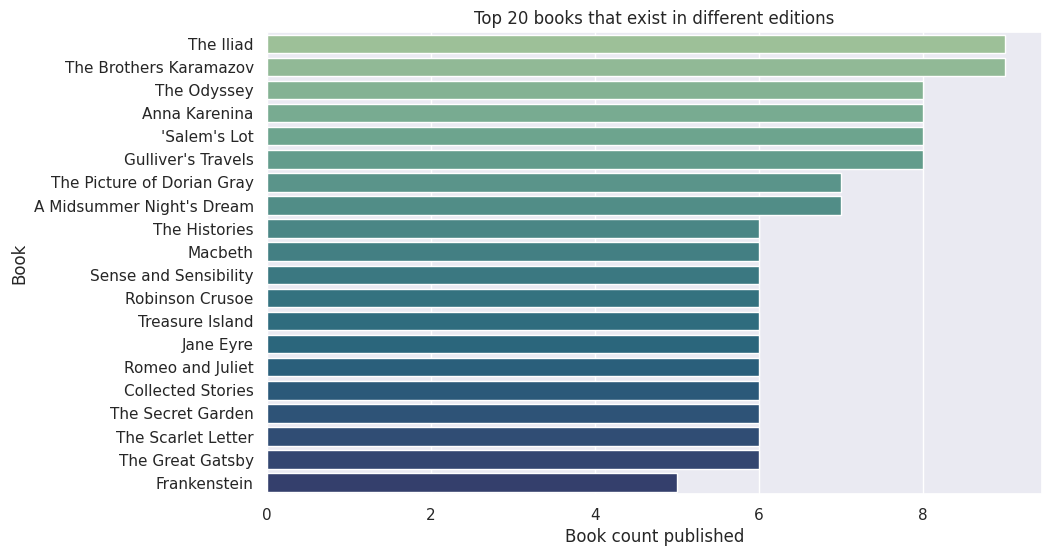

In [198]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=title,x=title['count'][:20],y=title.index[:20],palette='crest')
plt.title('Top 20 books that exist in different editions')
plt.xlabel('Book count published')
plt.ylabel('Book')
plt.show()

In [199]:
# top_rated_authors
author_stats = book_df.groupby('authors').agg({'title':'count','average_rating':'mean'})

In [200]:
author_stats = pd.DataFrame(author_stats)

In [201]:
author_stats.reset_index(inplace=True)

In [202]:
author_stats.head()

,authors,title,average_rating
0,A.B. Yehoshua/Hillel Halkin,2,3.60
1,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,1,3.76
2,A.E. Cunningham/Harlan Ellison/Charles F. Mill...,1,4.15
3,A.J. Jacobs,1,3.76
4,A.M. Homes,1,3.28


In [203]:
author_stats.rename(columns={'title':'title_count'},inplace=True)

In [204]:
author_stats.head()

,authors,title_count,average_rating
0,A.B. Yehoshua/Hillel Halkin,2,3.60
1,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,1,3.76
2,A.E. Cunningham/Harlan Ellison/Charles F. Mill...,1,4.15
3,A.J. Jacobs,1,3.76
4,A.M. Homes,1,3.28


In [205]:
author_stats.shape

(6639, 3)

In [206]:
author_stats.sort_values(by='average_rating',ascending=False,inplace=True)

In [207]:
author_stats.head(30)

,authors,title_count,average_rating
3551,Keith Donohue,1,5.000000
3109,John Diamond,1,5.000000
5034,R. McL. Wilson,1,5.000000
4599,Nicholas Evans/Rhonda Evans,1,5.000000
2727,James E. Campbell,1,5.000000
402,Aristophanes/F.W. Hall/W.M. Geldart,1,5.000000
943,Chris Green/Chris Wright/Paul Douglas Gardner,1,5.000000
5630,Sheri Rose Shepherd,1,5.000000
3672,Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,1,5.000000
6135,Todd Davis/Marc Frey,1,5.000000


In [208]:
# 30 top-rated authors *considering only average_rating

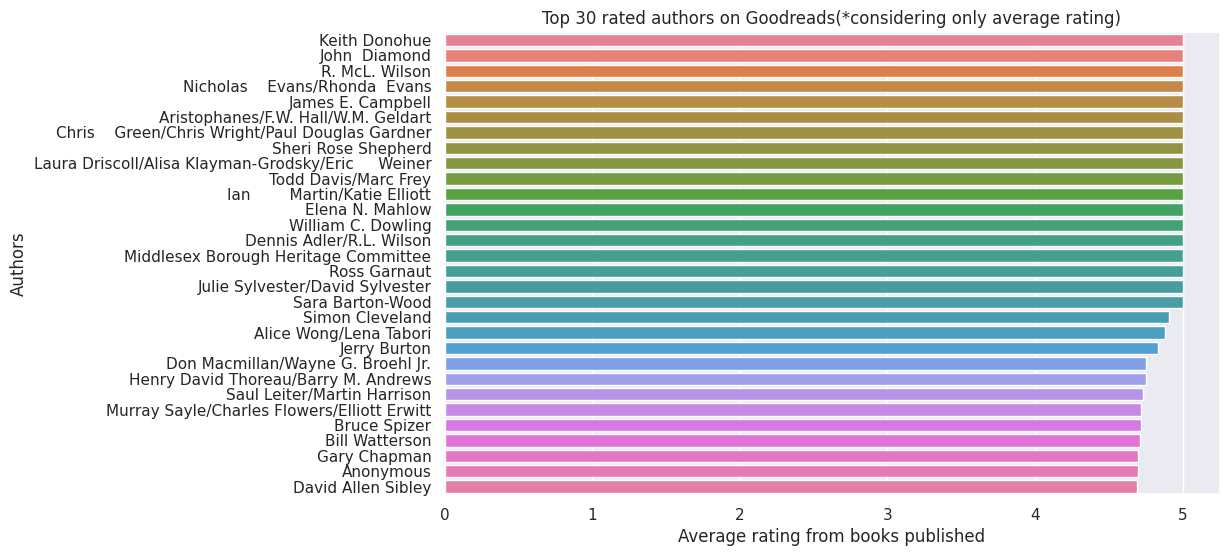

In [209]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=author_stats,x=author_stats['average_rating'][:30],y=author_stats['authors'][:30],palette='husl')
plt.title('Top 30 rated authors on Goodreads(*considering only average rating)')
plt.xlabel('Average rating from books published')
plt.ylabel('Authors')
plt.show()

In [210]:
weight_average_rating = 0.6
weight_title_count = 0.4

In [211]:
author_stats.title_count.dtype

dtype('int64')

In [212]:
author_stats.average_rating.dtype

dtype('float64')

In [213]:
weight_average_rating = 0.6
weight_title_count = 0.4


author_stats['weighted_score'] = (weight_average_rating * author_stats['average_rating']) + (weight_title_count * author_stats['title_count'])

top_rated_authors = author_stats.sort_values(by='weighted_score', ascending=False)

In [214]:
top_rated_authors.head(30)

,authors,title_count,average_rating,weighted_score
4747,P.G. Wodehouse,40,4.147250,18.488350
5786,Stephen King,40,3.973500,18.384100
5470,Rumiko Takahashi,39,4.186667,18.112000
4711,Orson Scott Card,35,3.779143,16.267486
46,Agatha Christie,33,3.989091,15.593455
4987,Piers Anthony,30,3.716667,14.230000
4305,Mercedes Lackey,29,4.039310,14.023586
5528,Sandra Brown,29,3.742069,13.845241
1401,Dick Francis,28,3.962143,13.577286
6030,Terry Pratchett,23,4.113043,11.667826


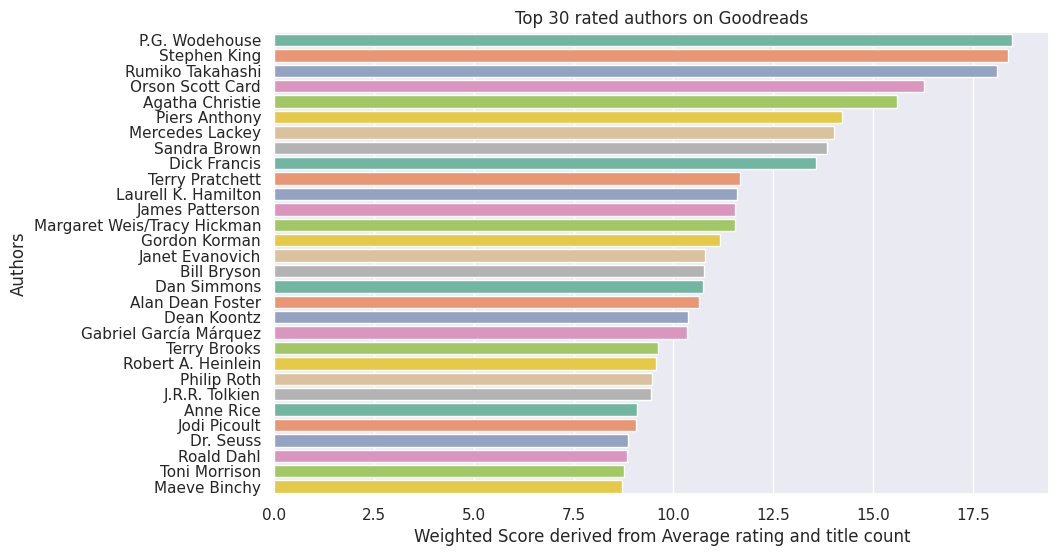

In [215]:
# top 30 rated authors on goodreads considering both average ratings and title count
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=top_rated_authors,x=top_rated_authors['weighted_score'][:30],y=top_rated_authors['authors'][:30],palette='Set2')
plt.title('Top 30 rated authors on Goodreads')
plt.xlabel('Weighted Score derived from Average rating and title count')
plt.ylabel('Authors')
plt.show()

In [216]:
# Top rated books * considering only average rating

In [217]:
top_books = book_df.groupby('title')['average_rating'].mean()

In [218]:
top_books = pd.DataFrame(top_books)

In [219]:
top_books.reset_index(inplace=True)

In [220]:
top_books.head()

,title,average_rating
0,said the shotgun to the head.,4.22000
1,$30 Film School: How to Write Direct Produce...,3.49000
2,'Salem's Lot,4.04875
3,1 000 Places to See Before You Die,3.85000
4,10 lb Penalty,3.90000


In [221]:
top_books.sort_values(by='average_rating',ascending=False,inplace=True)

In [222]:
top_books.head(30)

,title,average_rating
7190,The Complete Theory Fun Factory: Music Theory ...,5.00
7892,The Irish Anatomist: A Study of Flann O'Brien,5.00
1554,Colossians and Philemon: A Critical and Exeget...,5.00
6645,The American Campaign: U.S. Presidential Campa...,5.00
965,Bill Gates: Computer Legend (Famous Lives),5.00
10076,Winchester Shotguns,5.00
10068,Willem de Kooning: Late Paintings,5.00
2479,Fanning the Flame: Bible Cross and Mission,5.00
1887,Delwau Duon: Peintiadau Nicholas Evans = Symph...,5.00
5034,Oliver Wendell Holmes in Paris: Medicine Theo...,5.00


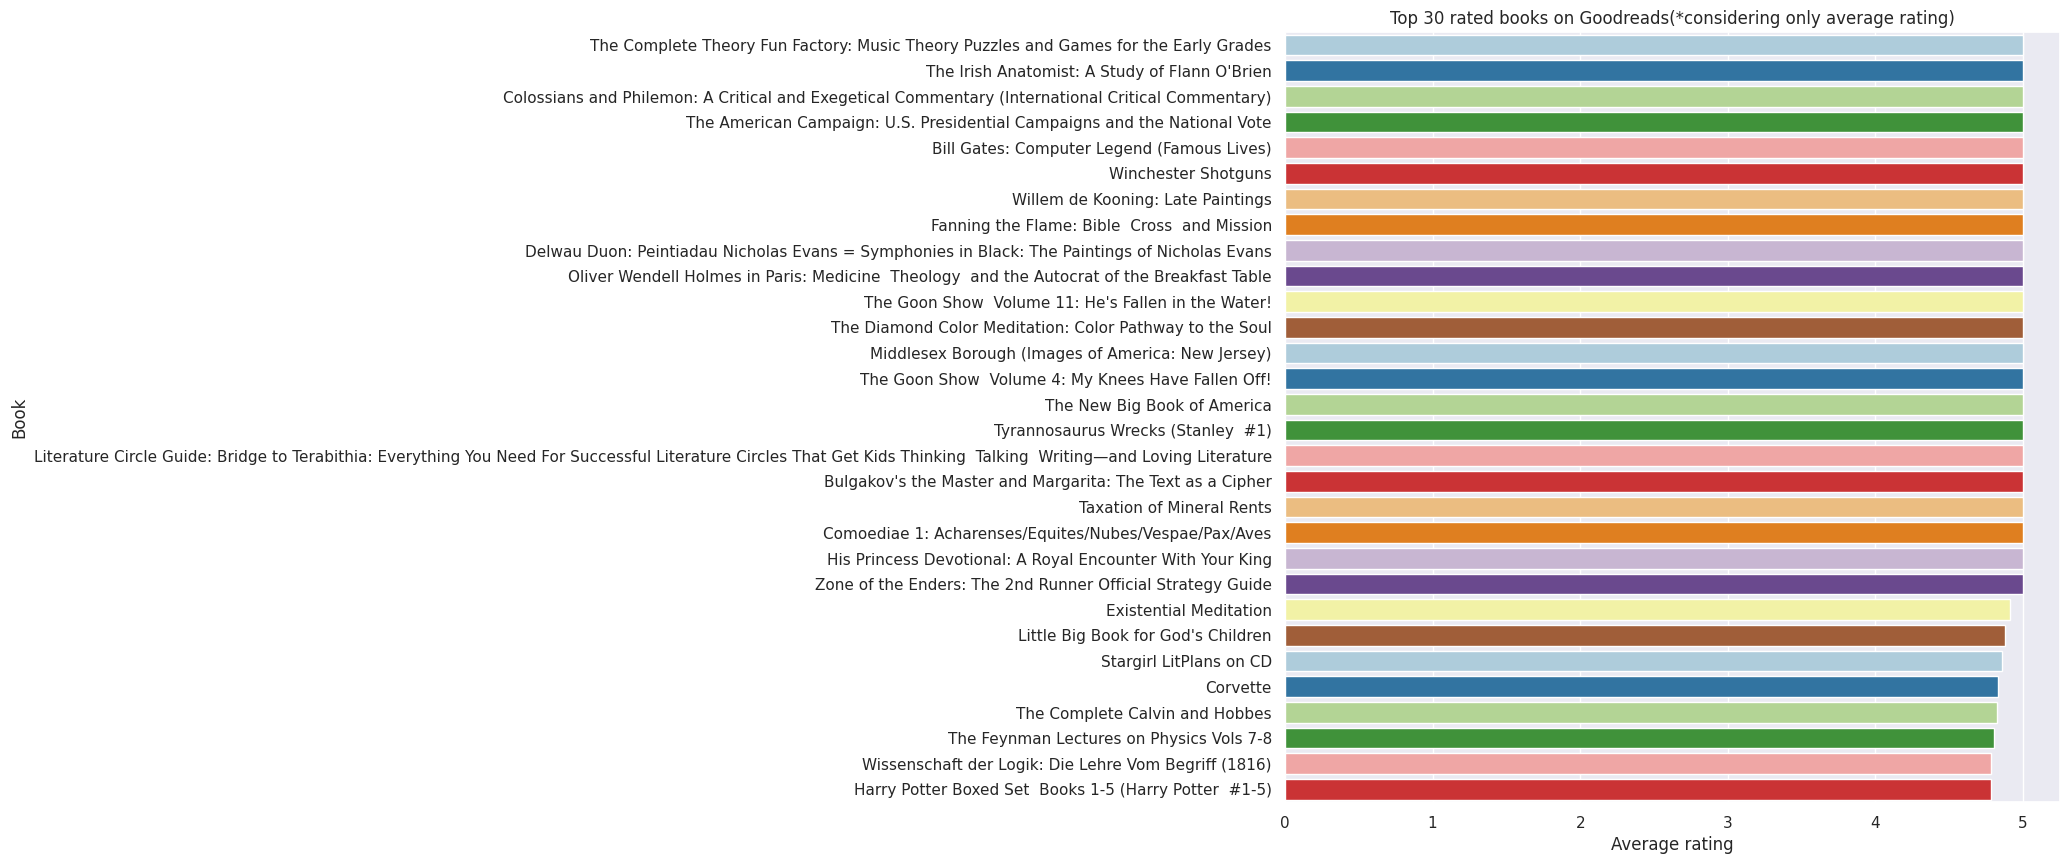

In [223]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

sns.barplot(data=top_books,x=top_books['average_rating'][:30],y=top_books['title'][:30],palette='Paired')
plt.title('Top 30 rated books on Goodreads(*considering only average rating)')
plt.xlabel('Average rating')
plt.ylabel('Book')
plt.show()

In [224]:
# Top rated books considering average_rating , ratings_count,	text_reviews_count

In [225]:
weight_average_rating = 0.6
weight_ratings_count = 0.2
weight_text_reviews_count = 0.2


book_df['weighted_score_ratings'] = (weight_average_rating * book_df['average_rating']) + (weight_ratings_count * book_df['ratings_count']) + (weight_text_reviews_count * book_df['text_reviews_count'])

top_rated_books = book_df.sort_values(by='weighted_score_ratings', ascending=False)

In [226]:
top_rated_books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_month,publication_day,publication_year,weighted_score_ratings
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,English,501,4597666,94265,9/6/2006,Little Brown and Company,9,6,2006,938388.354
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,English,366,2530894,32871,8/15/2002,Houghton Mifflin,8,15,2002,512755.562
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,English,277,2457092,43499,1/30/2001,Back Bay Books,1,30,2001,500120.480
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,English,736,2418736,21303,4/1/2006,Pocket Books,4,1,2006,488010.134
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,English,435,2339585,36325,5/1/2004,Scholastic Inc.,5,1,2004,475184.736


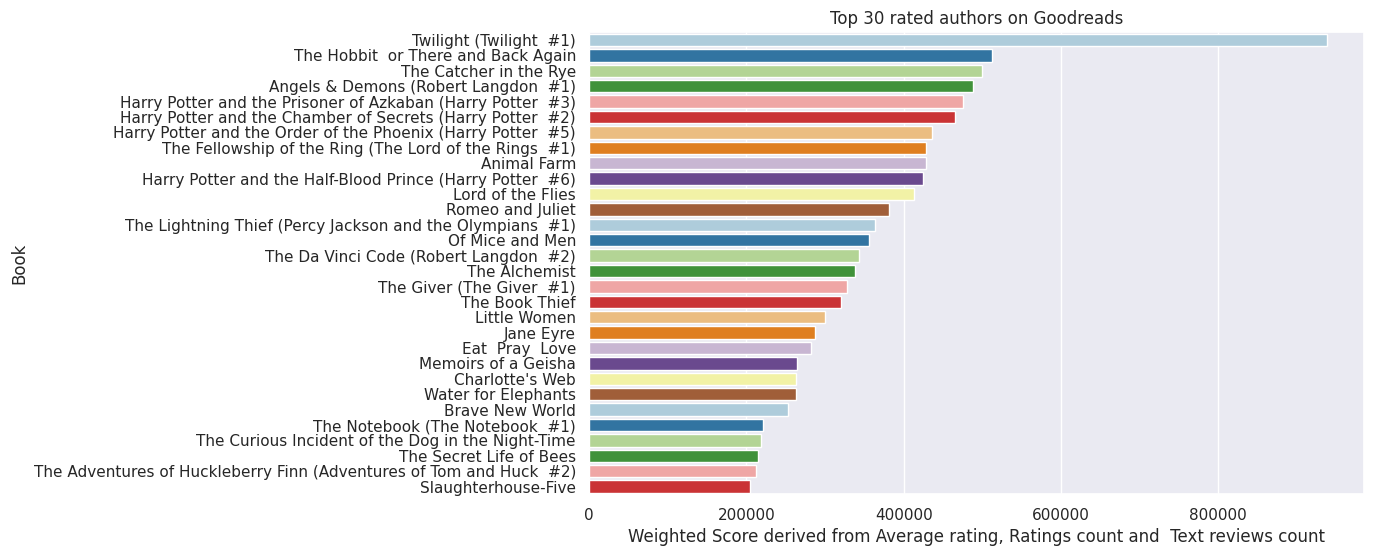

In [227]:
# top 30 rated books on goodreads considering average_rating , ratings_count,	text_reviews_count
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=top_rated_books,x=top_rated_books['weighted_score_ratings'][:30],y=top_rated_books['title'][:30],palette='Paired')
plt.title('Top 30 rated authors on Goodreads')
plt.xlabel('Weighted Score derived from Average rating, Ratings count and  Text reviews count')
plt.ylabel('Book')
plt.show()